In [1]:
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 14

In [3]:
bike = pd.read_csv("database-project-04.csv")
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bike["datas"] = pd.to_datetime(bike["datas"])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datas        17414 non-null  datetime64[ns]
 1   contagem     17414 non-null  int64         
 2   temperatura  17414 non-null  float64       
 3   sensacao     17414 non-null  float64       
 4   umidade      17414 non-null  float64       
 5   vel_vento    17414 non-null  float64       
 6   clima        17414 non-null  float64       
 7   feriado      17414 non-null  float64       
 8   final_ds     17414 non-null  float64       
 9   estacao      17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

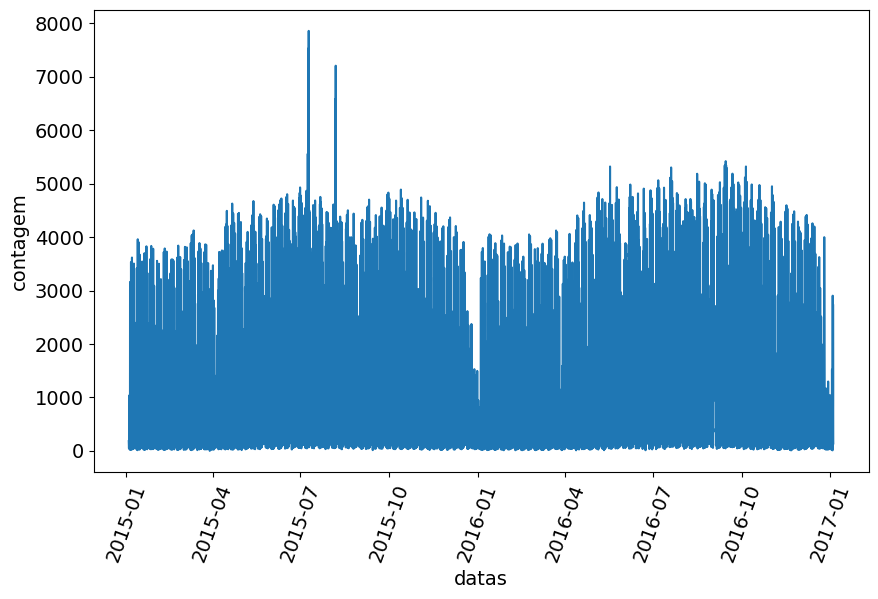

In [5]:
sns.lineplot(x="datas", y="contagem", data=bike)
plt.xticks(rotation=70)

In [6]:
sc2 = StandardScaler()

In [7]:
sc2.fit(bike["contagem"].values.reshape(-1,1))

StandardScaler()

In [8]:
y = sc2.transform(bike["contagem"].values.reshape(-1,1))

In [9]:
poporcao_dados_para_treino = 0.9
tamanho_treino = int(len(bike)*poporcao_dados_para_treino)
tamanho_teste = len(bike) - tamanho_treino
print(f"Dados totais: {len(bike)} | Taxa de dados para treino: {poporcao_dados_para_treino*100:.2f}% | Dados para treino: {tamanho_treino} | Dados para teste: {tamanho_teste}")

Dados totais: 17414 | Taxa de dados para treino: 90.00% | Dados para treino: 15672 | Dados para teste: 1742


In [10]:
ytreino = y[:tamanho_treino]
yteste = y[tamanho_treino:]
print(f"Y para treino: {len(ytreino)} | Y para teste: {len(yteste)}")

Y para treino: 15672 | Y para teste: 1742


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

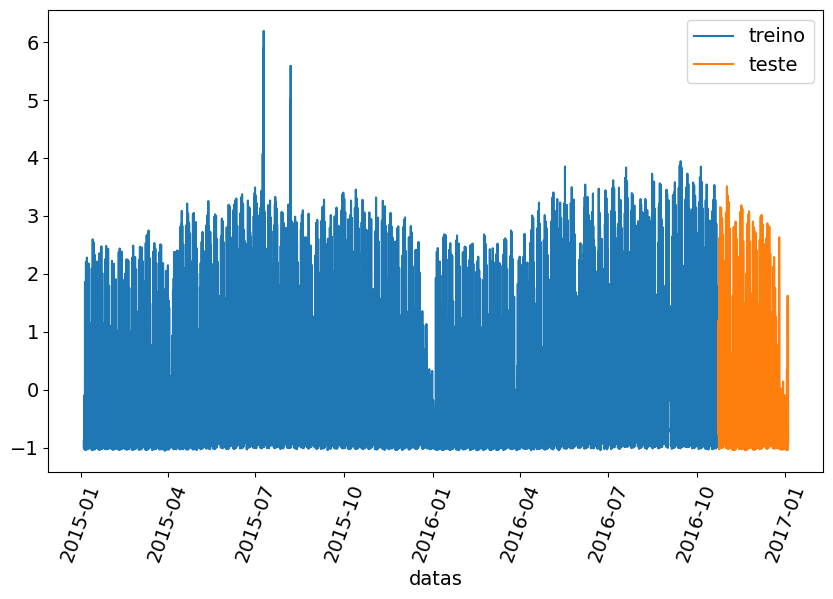

In [11]:
sns.lineplot(x="datas", y=ytreino[:,0], data=bike[:tamanho_treino], label="treino")
sns.lineplot(x="datas", y=yteste[:,0], data=bike[tamanho_treino:], label="teste")
plt.xticks(rotation=70)

In [12]:
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []

    for i in range (n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [13]:
vetor = pd.DataFrame(ytreino)[0]

In [14]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [15]:
vetor2 = pd.DataFrame(yteste)[0]

In [16]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)
xteste_novo

array([[-0.75948685, -0.36780954,  0.19897056, ...,  1.16387912,
         0.85330205,  0.6293548 ],
       [-0.36780954,  0.19897056,  0.69755273, ...,  0.85330205,
         0.6293548 ,  0.21463765],
       [ 0.19897056,  0.69755273,  0.94269664, ...,  0.6293548 ,
         0.21463765, -0.22957049],
       ...,
       [-0.46734166, -0.29316046, -0.24431599, ...,  0.9924627 ,
        -0.09317463, -0.55489306],
       [-0.29316046, -0.24431599, -0.34845608, ..., -0.09317463,
        -0.55489306, -0.74289816],
       [-0.24431599, -0.34845608, -0.27472858, ..., -0.55489306,
        -0.74289816, -0.84703824]])

In [17]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))
xtreino_novo[:1]

array([[[-0.88574518],
        [-0.9262953 ],
        [-0.92998167],
        [-0.98712048],
        [-1.01016032],
        [-1.01108192],
        [-1.00647395],
        [-0.9843557 ],
        [-0.93274645],
        [-0.77607553]]])

In [18]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))
xteste_novo[:1]

array([[[-0.75948685],
        [-0.36780954],
        [ 0.19897056],
        [ 0.69755273],
        [ 0.94269664],
        [ 1.19060533],
        [ 0.9767956 ],
        [ 1.16387912],
        [ 0.85330205],
        [ 0.6293548 ]]])

In [41]:
recorrente = keras.Sequential()
recorrente.add(keras.layers.LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(keras.layers.Dense(units=1))
recorrente.compile(loss="mean_squared_error", optimizer="RMSProp")
recorrente.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo,
                           validation_data=(xteste_novo, yteste_novo),
                           epochs=100)

Epoch 1/100
490/490 [==============================] - 9s 12ms/step - loss: 0.2785 - val_loss: 0.0772
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0833 - val_loss: 0.0367
Epoch 3/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0569 - val_loss: 0.0321
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0484 - val_loss: 0.0340
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0447 - val_loss: 0.0294
Epoch 6/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0422 - val_loss: 0.0277
Epoch 7/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0402 - val_loss: 0.0227
Epoch 8/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0383 - val_loss: 0.0485
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0372 - val_loss: 0.0285
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.035

In [22]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 3s 5ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

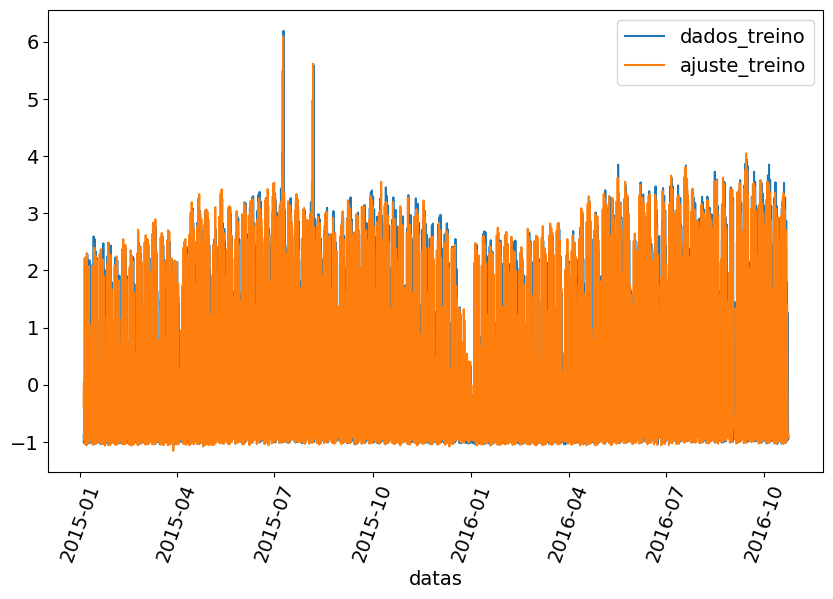

In [37]:
sns.lineplot(x="datas", y=ytreino[:,0], data=bike[:tamanho_treino], label="dados_treino")
sns.lineplot(x="datas", y=y_ajustado[:,0], data=bike[:15662], label="ajuste_treino")
plt.xticks(rotation=70)

In [38]:
y_predito = recorrente.predict(xteste_novo)

 1/55 [..............................] - ETA: 2s

55/55 [==============================] - 0s 5ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

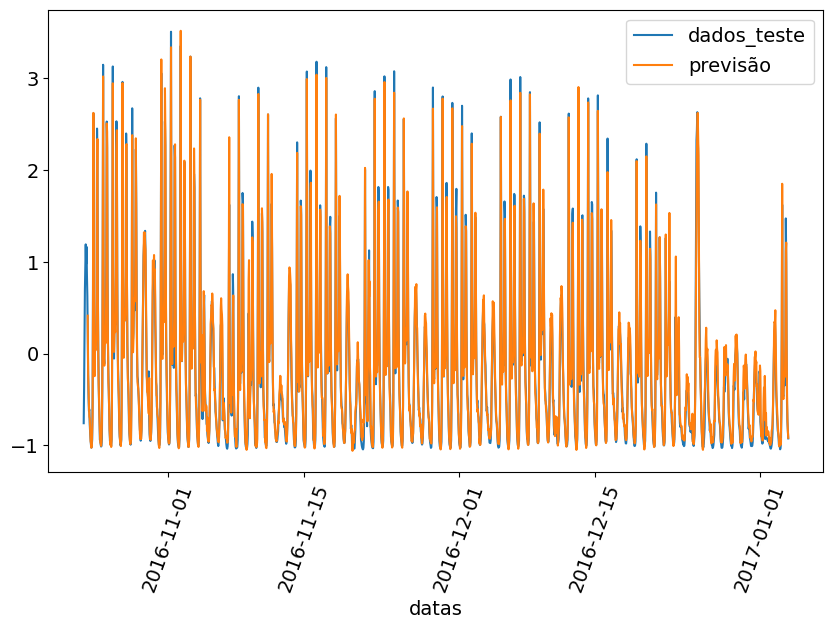

In [39]:
sns.lineplot(x="datas", y=yteste[:,0], data=bike[tamanho_treino:], label="dados_teste")
sns.lineplot(x="datas", y=y_predito[:,0], data=bike[tamanho_treino+10:], label="previsão")
plt.xticks(rotation=70)

In [42]:
recorrente_gru = keras.Sequential()
recorrente_gru.add(keras.layers.GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_gru.add(keras.layers.Dense(units=1))
recorrente_gru.compile(loss="mean_squared_error", optimizer="RMSProp")
recorrente_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
print(recorrente.summary(), recorrente_gru.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                            

In [48]:
resultado2 = recorrente_gru.fit(xtreino_novo, ytreino_novo,
                                validation_data=(xteste_novo, yteste_novo),
                                epochs=100)

Epoch 1/100
490/490 [==============================] - 10s 13ms/step - loss: 0.2431 - val_loss: 0.0683
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0679 - val_loss: 0.0373
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0494 - val_loss: 0.0376
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0437 - val_loss: 0.0271
Epoch 5/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0400 - val_loss: 0.0391
Epoch 6/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0373 - val_loss: 0.0276
Epoch 7/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0352 - val_loss: 0.0191
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0343 - val_loss: 0.0254
Epoch 9/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0334 - val_loss: 0.0242
Epoch 10/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0322 - v

In [49]:
y_predito2 = recorrente_gru.predict(xteste_novo)

55/55 [==============================] - 1s 4ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

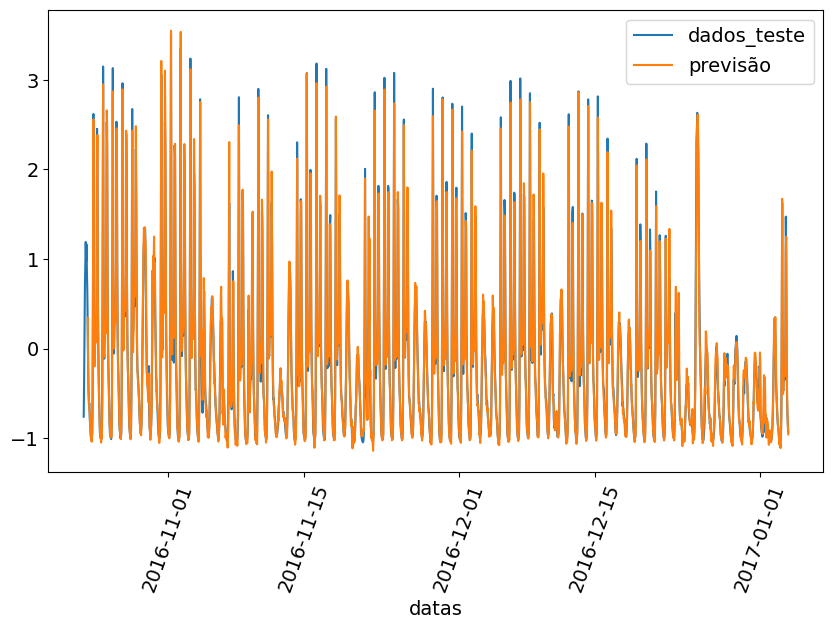

In [50]:
sns.lineplot(x="datas", y=yteste[:,0], data=bike[tamanho_treino:], label="dados_teste")
sns.lineplot(x="datas", y=y_predito2[:,0], data=bike[tamanho_treino+10:], label="previsão")
plt.xticks(rotation=70)

In [51]:
resultado.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Custo')

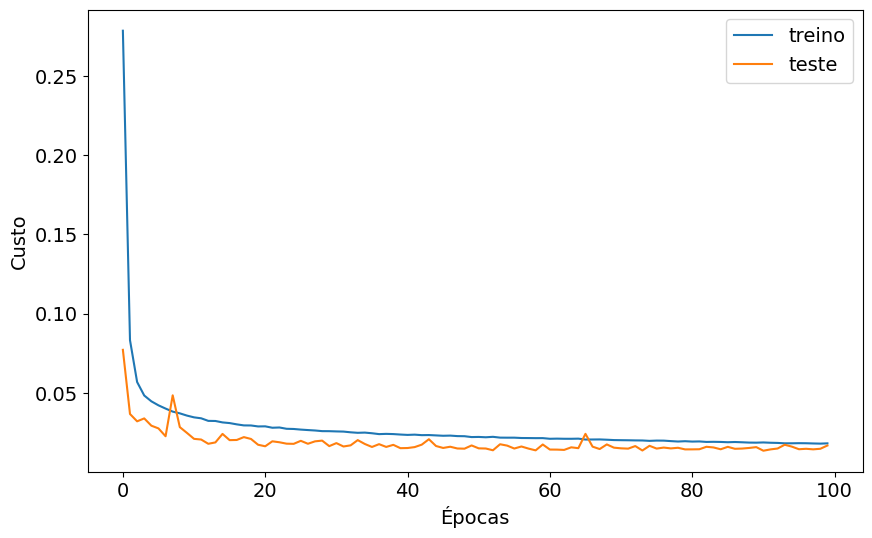

In [55]:
plt.plot(resultado.history["loss"])
plt.plot(resultado.history["val_loss"])
plt.legend(["treino", "teste"])
plt.xlabel("Épocas")
plt.ylabel("Custo")

Text(0, 0.5, 'Custo')

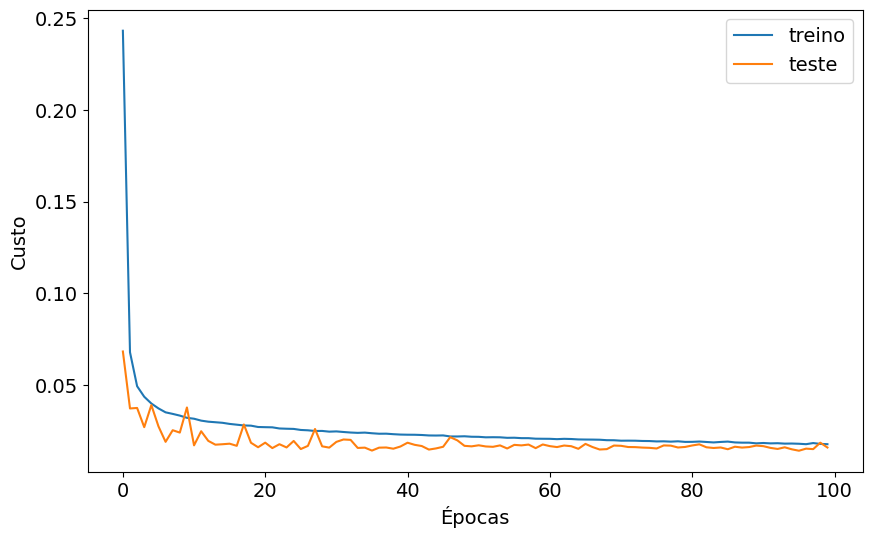

In [57]:
plt.plot(resultado2.history["loss"])
plt.plot(resultado2.history["val_loss"])
plt.legend(["treino", "teste"])
plt.xlabel("Épocas")
plt.ylabel("Custo")